📦 1. Datensatz laden
Hier importieren wir die Funktion load_breast_cancer aus der scikit-learn-Bibliothek, einer der wichtigsten Bibliotheken für maschinelles Lernen in Python. Anschließend rufen wir die Funktion auf und laden den kompletten Datensatz in die Variable breast. Dieser Datensatz enthält verschiedene Messwerte (Features) von Brustkrebstumoren sowie deren Klassifizierung als gutartig oder bösartig. 🩺

In [18]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
breast = load_breast_cancer()


📊 2. Daten extrahieren
Der geladene breast-Datensatz ist ein Objekt, das mehrere Informationen enthält. Mit breast.data greifen wir gezielt auf die reinen Messwerte (die Features) zu und speichern sie in der Variable breast_data. Das sind die rohen Zahlen, die wir für unsere Analyse verwenden werden.

In [19]:
breast_data = breast.data

📏 3. Dimensionen prüfen
Der Befehl .shape gibt uns die Dimensionen unserer Daten zurück. Das Ergebnis (569, 30) bedeutet, wir haben 569 Zeilen (also 569 Tumorproben) und 30 Spalten (also 30 verschiedene Messwerte pro Probe). Das ist ein relativ hochdimensionaler Datensatz, den wir später vereinfachen wollen.

In [20]:
breast_data.shape

(569, 30)

👀 4. Rohdaten ansehen
Hier lassen wir uns einfach den Inhalt von breast_data ausgeben. Wie man sieht, ist das eine große Ansammlung von Zahlen, in der es auf den ersten Blick unmöglich ist, Muster zu erkennen. Genau deshalb brauchen wir Techniken wie die Hauptkomponentenanalyse (PCA).

🏷️ 5. Labels (Zielwerte) extrahieren
Ähnlich wie bei breast.data extrahieren wir hier mit breast.target die dazugehörigen Klassifizierungen (Labels). Das ist eine Liste mit Nullen und Einsen, die angeben, ob eine Tumorprobe als gutartig (Benign) oder bösartig (Malignant) eingestuft wurde.

In [21]:
breast_data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [22]:
breast_labels = breast.target

🏗️ 6. Daten zu einem DataFrame zusammenfügen
Um die Daten übersichtlicher zu gestalten, fügen wir die Messwerte (breast_data) und die Labels (breast_labels) zu einer einzigen Tabelle zusammen. Dafür nutzen wir die pandas-Bibliothek, die extrem nützlich für die Datenanalyse ist.

Wir importieren numpy und pandas.

Wir formen die Labels in ein spaltenförmiges Array um.

Wir verketten Daten und Labels zu einem großen Array.

Wir erstellen daraus einen DataFrame, der Spaltennamen für eine bessere Lesbarkeit hat. 

In [23]:
import numpy as np
labels = np.reshape(breast_labels,(569,1))
final_breast_data=np.concatenate([breast_data,labels],axis=1)
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data, columns=list(breast.feature_names) + ['label'])

💬 7. Labels verständlich machen
Die Labels 0 und 1 sind für einen Computer super, aber für uns Menschen nicht sehr aussagekräftig. Deshalb ersetzen wir in der Spalte 'label' die 0 durch 'Benign' (gutartig) und die 1 durch 'Malignant' (bösartig). Das macht die späteren Grafiken viel verständlicher.

In [24]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)


/tmp/ipykernel_3576/3911854678.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_dataset['label'].replace(0, 'Benign',inplace=True)


⚖️ 8. Daten skalieren (Standardisierung)
Das ist ein extrem wichtiger Schritt für die PCA! Unsere 30 Features haben sehr unterschiedliche Wertebereiche (z.B. Fläche vs. Radius). Damit Features mit größeren Werten die Analyse nicht übermäßig dominieren, müssen wir alle Daten auf eine einheitliche Skala bringen. Der StandardScaler transformiert die Daten so, dass jedes Feature einen Mittelwert von 0 und eine Standardabweichung von 1 hat. So hat jedes Merkmal das gleiche "Stimmrecht". ⚖️

In [25]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, breast.feature_names].values
x = StandardScaler().fit_transform(x) # normalizing the features


In [26]:
x.shape

(569, 30)

In [27]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

 10. Normalisierte Daten anzeigen
Um die skalierten Daten besser betrachten zu können, packen wir sie wieder in einen temporären DataFrame. .tail() zeigt uns die letzten 5 Zeilen an. Man sieht jetzt, dass die Werte um den Nullpunkt herum schwanken, anstatt ihre ursprünglichen, unterschiedlichen Skalen zu haben.

In [28]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]


In [29]:
normalised_breast = pd.DataFrame(x,columns=feat_cols)


In [30]:
normalised_breast.tail()


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


✨ 11. Hauptkomponentenanalyse (PCA) durchführen
Jetzt kommt die Magie! ✨ Wir führen die PCA durch, um die 30 Dimensionen auf nur 3 Hauptkomponenten zu reduzieren.

Wir importieren die PCA-Klasse.

Wir erstellen ein PCA-Objekt und geben mit n_components=3 an, dass wir die 3 wichtigsten Komponenten finden wollen. Diese 3 neuen "Achsen" fangen so viel wie möglich von der ursprünglichen Information (Varianz) der 30 Features ein.

Mit fit_transform(x) wird die PCA auf unsere skalierten Daten angewendet. Das Ergebnis ist ein neues Array, in dem jede Tumorprobe nicht mehr durch 30, sondern nur noch durch 3 Werte beschrieben wird.

In [31]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=3)
principalComponents_breast = pca_breast.fit_transform(x)

📈 12. PCA-Ergebnisse in einen DataFrame umwandeln
Das Ergebnis der PCA ist wieder ein NumPy-Array. Für die einfache Handhabung und Visualisierung wandeln wir es in einen Pandas DataFrame um und geben den neuen Spalten aussagekräftige Namen: 'principal component 1', 'principal component 2' und 'principal component 3'.

In [32]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_breast_Df.tail()



,principal component 1,principal component 2,principal component 3
564,6.439315,-3.576817,2.459487
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562731
567,10.374794,1.672010,-1.877029
568,-5.475243,-0.670637,1.490443


💡 13. Erklärte Varianz analysieren
Dieser Schritt ist entscheidend, um die Qualität unserer Dimensionsreduktion zu bewerten. explained_variance_ratio_ sagt uns, wie viel Prozent der ursprünglichen Datenvarianz von jeder Hauptkomponente "erklärt" wird.

PC1 erklärt ca. 44,3 %

PC2 erklärt ca. 19,0 %

PC3 erklärt ca. 9,4 %
Zusammen erklären diese 3 Komponenten also über 72 % der gesamten Varianz der ursprünglichen 30 Features! Das ist eine ziemlich gute Komprimierung

In [33]:
print('Explained variability per principal component: {}'.format(pca_breast.explained_variance_ratio_))


Explained variability per principal component: [0.44272026 0.18971182 0.09393163]


🎨 14. Ergebnisse in 3D visualisieren
Zum Schluss visualisieren wir unsere Ergebnisse. Wir erstellen ein 3D-Streudiagramm, bei dem die drei Achsen unsere drei Hauptkomponenten sind. Jeder Punkt stellt eine Tumorprobe dar.

Wir färben die Punkte basierend auf ihren ursprünglichen Labels: rot für 'Benign' (gutartig) und grün für 'Malignant' (bösartig).

Die Grafik zeigt, wie gut die PCA die beiden Klassen (gutartig vs. bösartig) in diesem neuen, 3-dimensionalen Raum voneinander trennt. Eine gute Trennung bedeutet, dass die Hauptkomponenten die relevanten Unterschiede in den Daten gut erfasst haben.

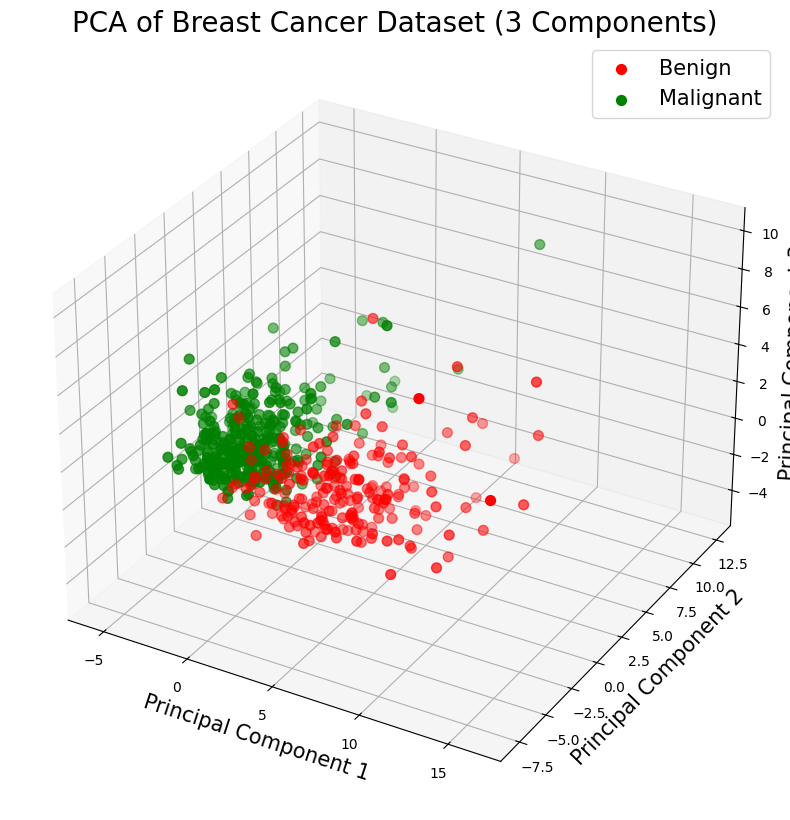

In [34]:
from mpl_toolkits.mplot3d import Axes3D

pca_breast = PCA(n_components=3)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data=principalComponents_breast, columns=['PC1', 'PC2', 'PC3'])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = breast_dataset['label'] == target
    ax.scatter(
        principal_breast_Df.loc[indicesToKeep, 'PC1'],
        principal_breast_Df.loc[indicesToKeep, 'PC2'],
        principal_breast_Df.loc[indicesToKeep, 'PC3'],
        c=color, s=50
    )
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15)
ax.set_title('PCA of Breast Cancer Dataset (3 Components)', fontsize=20)
ax.legend(targets, prop={'size': 15})
plt.show()
